# 📊 Loan Status Prediction

## 📌 Overview
Financial institutions receive thousands of loan applications daily, and manually assessing each application can be time-consuming and error-prone.  
This project applies **Machine Learning techniques** to predict loan approval status automatically.  

By analyzing applicant data such as income, credit history, employment details, and loan amount, the model helps in making **faster and more accurate lending decisions**.  
The project not only focuses on predictive modeling but also emphasizes **data cleaning, exploratory analysis, and feature engineering**, making it a complete end-to-end data science solution.

---

## 🎯 Objectives
- Automate the loan approval process using machine learning.  
- Analyze factors influencing loan approvals.  
- Compare multiple ML algorithms to identify the best-performing model.  
- Provide a framework that can be extended for real-world deployment.  

---

## 🚀 Key Features
- **Data Preprocessing**: Handling missing values, categorical encoding, feature scaling.  
- **Exploratory Data Analysis (EDA)**: Visual insights into patterns, distributions, and correlations.  
- **Feature Engineering**: Creating and selecting meaningful features to improve model accuracy.  
- **Model Training**: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and more.  
- **Evaluation Metrics**: Accuracy, Precision, Recall, F1-score, and Confusion Matrix.  
- **Insights**: Identify the most important applicant features influencing loan approval decisions.  

---

## 🛠️ Tech Stack
- **Language**: Python 3  
- **Libraries**:  
  - `pandas`, `numpy` → data manipulation  
  - `matplotlib`, `seaborn` → data visualization  
  - `scikit-learn` → machine learning models & evaluation  
- **Environment**: Jupyter Notebook  

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import svm
sns.set()

In [2]:
df = pd.read_csv('loandata.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_data = df.copy()

In [10]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'N':0,'Y':1})

In [12]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [14]:
loan_data = loan_data.replace(to_replace = '3+', value = 4)

In [15]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [16]:
new_data = loan_data.copy()

<Axes: xlabel='Education', ylabel='count'>

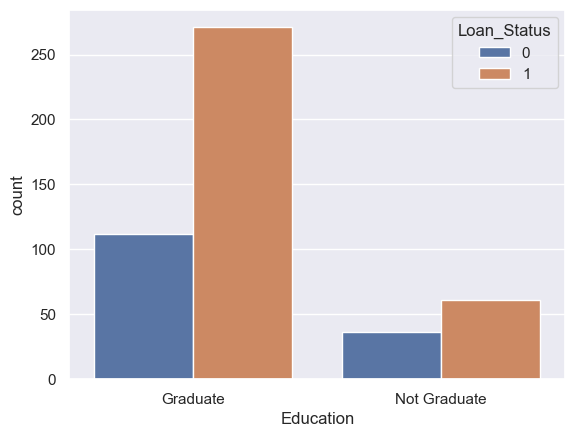

In [17]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = new_data)

<Axes: xlabel='Married', ylabel='count'>

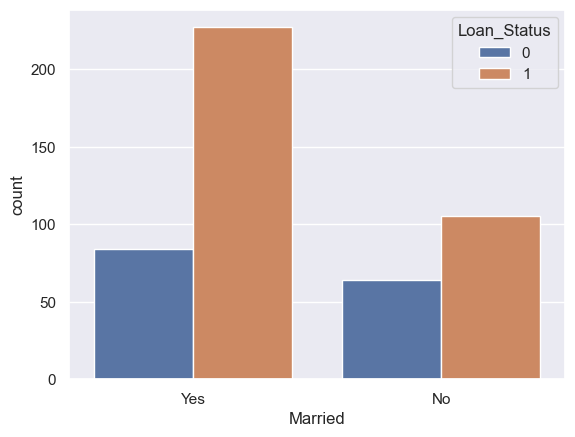

In [18]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = new_data)

In [19]:
new_data = new_data.replace({
    'Gender': {'Female': 0, 'Male': 1},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Urban': 1, 'Semiurban': 2}
}).infer_objects(copy=False) 


C:\Users\vinayak\AppData\Local\Temp\ipykernel_1524\3380876361.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data = new_data.replace({


In [20]:
x = new_data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
y = new_data['Loan_Status']

In [21]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [22]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 2)
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


In [27]:
model = svm.SVC(kernel = 'linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
x_train_prediction = model.predict(x_train)
x_train_accuracy = accuracy_score(x_train_prediction, y_train)
print('train accuracy :',x_train_accuracy )

train accuracy : 0.7777777777777778


In [31]:
x_test_prediction = model.predict(x_test)
x_test_accuracy = accuracy_score(x_test_prediction, y_test)
print('testing accuracy :',x_test_accuracy )

testing accuracy : 0.7916666666666666


In [34]:
input_data = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)
input_data_np = np.asarray(input_data)
reshaped_data = input_data_np.reshape(1,-1)


In [35]:
prediction = model.predict(reshaped_data)
print('prediction :', prediction)

prediction : [1]


C:\Users\vinayak\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [37]:
if(prediction == [1]):
    print('Eligible for loan')

else:
    print('Not eligible for loan')

Eligible for loan
